In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from mpl_toolkits.basemap import Basemap, supported_projections

### Load data

In [2]:
query_1 = pd.read_csv('../Data/query_1.csv', delimiter='|')
query_2 = pd.read_csv('../Data/query_2.csv', delimiter='|')

data = query_1.append(query_2)
data.sort_values(by='Time', ascending=True, inplace=True)
data = data.reset_index()

del query_1
del query_2

data.head()

,index,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName
0,14970,2269439,2010-10-13T21:41:46.570000,42.623,12.756,10.5,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.7,--,3 km W Ferentillo (TR)
1,14969,2269449,2010-10-13T21:43:14.530000,42.457,13.390,10.8,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.7,--,8 km E Pizzoli (AQ)
2,14968,2269479,2010-10-13T23:35:35.700000,42.470,13.377,11.0,BULLETIN-SISPICK,NaN,NaN,NaN,ML,0.8,--,8 km E Pizzoli (AQ)
3,14967,2269489,2010-10-13T23:44:28.160000,42.474,13.393,12.9,BULLETIN-SISPICK,NaN,NaN,NaN,ML,1.3,--,9 km E Pizzoli (AQ)
4,14966,2269499,2010-10-13T23:46:11.610000,42.448,13.387,10.2,BULLETIN-SISPICK,NaN,NaN,NaN,ML,2.0,--,8 km E Pizzoli (AQ)


In [3]:
interesting_cols = ['Time', 'Latitude', 'Longitude', 'Depth/Km', 'Magnitude', 'EventLocationName']
data = data[interesting_cols]

# save dataset
data.to_csv('../Data/earthquake_dataset.csv', index=False)

data.head()

,Time,Latitude,Longitude,Depth/Km,Magnitude,EventLocationName
0,2010-10-13T21:41:46.570000,42.623,12.756,10.5,1.7,3 km W Ferentillo (TR)
1,2010-10-13T21:43:14.530000,42.457,13.390,10.8,1.7,8 km E Pizzoli (AQ)
2,2010-10-13T23:35:35.700000,42.470,13.377,11.0,0.8,8 km E Pizzoli (AQ)
3,2010-10-13T23:44:28.160000,42.474,13.393,12.9,1.3,9 km E Pizzoli (AQ)
4,2010-10-13T23:46:11.610000,42.448,13.387,10.2,2.0,8 km E Pizzoli (AQ)


### Basic Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29969 entries, 0 to 29968
Data columns (total 6 columns):
Time                 29969 non-null object
Latitude             29969 non-null float64
Longitude            29969 non-null float64
Depth/Km             29969 non-null float64
Magnitude            29969 non-null float64
EventLocationName    29969 non-null object
dtypes: float64(4), object(2)
memory usage: 1.4+ MB


### Basic statistics

In [5]:
data.describe()

,Latitude,Longitude,Depth/Km,Magnitude
count,29969.000000,29969.000000,29969.000000,29969.000000
mean,42.904270,13.030405,10.509326,1.187133
std,0.308547,0.290352,3.964903,0.427899
min,42.150000,11.604700,0.100000,0.000000
25%,42.664000,12.941000,8.600000,0.900000
50%,42.858800,13.103000,10.100000,1.100000
75%,43.062700,13.219200,11.400000,1.400000
max,43.750000,13.791700,70.900000,4.000000


In [50]:
len(np.unique(data['EventLocationName'].values))

4267

In [5]:
index_M_g3 = data[data['Magnitude'] >= 3].index.values.tolist()
index_M_l3 = data[data['Magnitude'] < 3].index.values.tolist()

print len(index_M_l3), len(index_M_g3)

29891 78


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=2198499.01959,4904832.43045,2387735.3079,4701480.04536&bboxSR=5520&imageSR=5520&size=1500,1611&dpi=96&format=png32&f=image


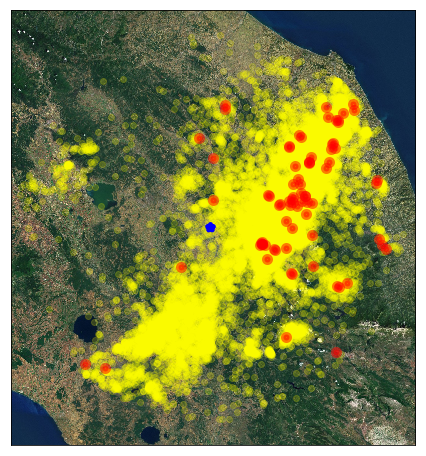

In [7]:
# draw map
lat_0 = 42.9509
lon_0 = 12.7015

fig = plt.figure(figsize=(8, 8))
#m = Basemap(projection='lcc', resolution='f',
#            width=1E6, height=1E6,
#            lat_0=lat_0, lon_0=lon_0, epsg=5520)
m = Basemap(llcrnrlon=lon_0-1, llcrnrlat=lat_0+1, urcrnrlon=lon_0+1, urcrnrlat=lat_0-1, epsg=5520)

xs, ys = m(data['Longitude'].values, data['Latitude'].values)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)

small_xs, small_ys = xs[index_M_l3], ys[index_M_l3]
m.scatter(small_xs, small_ys, latlon=False, linewidths=1, alpha=0.2, color='yellow')

big_xs, big_ys = xs[index_M_g3], ys[index_M_g3]
m.scatter(big_xs, big_ys, latlon=False, linewidths=5, alpha=0.5, color='red')

x_c, y_c = m(lon_0, lat_0)
m.scatter(x_c, y_c, linewidths=5, marker='*', color='blue')

plt.show()

In [11]:
help(Basemap.scatter)

Help on method scatter in module mpl_toolkits.basemap:

scatter(self, x, y, *args, **kwargs) unbound mpl_toolkits.basemap.Basemap method
    Plot points with markers on the map
    (see matplotlib.pyplot.scatter documentation).
    
    If ``latlon`` keyword is set to True, x,y are intrepreted as
    longitude and latitude in degrees.  Data and longitudes are
    automatically shifted to match map projection region for cylindrical
    and pseudocylindrical projections, and x,y are transformed to map
    projection coordinates. If ``latlon`` is False (default), x and y
    are assumed to be map projection coordinates.
    
    Extra keyword ``ax`` can be used to override the default axes instance.
    
    Other \**kwargs passed on to matplotlib.pyplot.scatter.



In [1]:
#help(Basemap)

# Exploratory Data Analysis

In [4]:
# normalize data between 0 and 1
numerical_features = ['Latitude', 'Longitude', 'Depth/Km', 'Magnitude']
x = data[numerical_features].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

data_scaled = pd.DataFrame(x_scaled, columns=numerical_features)
data_scaled.head()

,Latitude,Longitude,Depth/Km,Magnitude
0,0.295625,0.526429,0.146893,0.425
1,0.191875,0.816324,0.151130,0.425
2,0.200000,0.810380,0.153955,0.200
3,0.202500,0.817695,0.180791,0.325
4,0.186250,0.814952,0.142655,0.500


### Boxplot

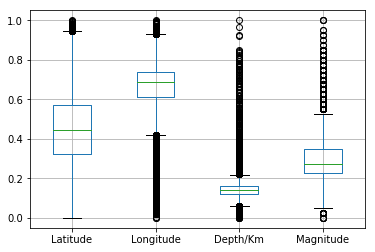

In [5]:
data_scaled.boxplot()
#plt.savefig('images/box_plot.png')
plt.show()

### Kernel Density Estimation

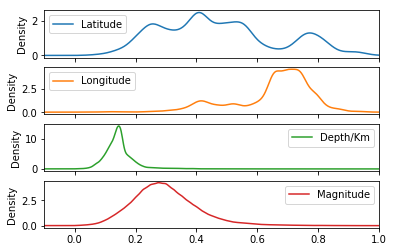

In [58]:
data_scaled[numerical_features].plot(kind='kde', subplots=True)
plt.xlim(-0.1,1,1)
plt.savefig('../images/data-distribution.png')
plt.show()

### Histograms

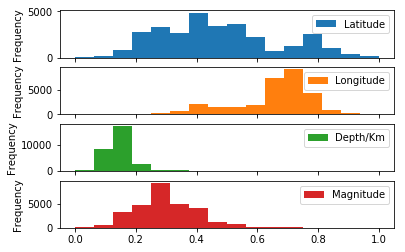

In [7]:
bins = int(np.ceil(np.log2(data_scaled.values.shape[0]) + 1)) # Sturge's rule for the number of bins
data_scaled.plot(kind='hist', bins=bins, subplots=True)
plt.show()

### Correlation

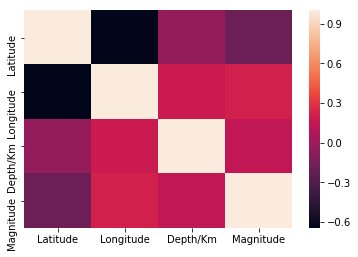

,Latitude,Longitude,Depth/Km,Magnitude
Latitude,1.000000,-0.642671,-0.029590,-0.190509
Longitude,-0.642671,1.000000,0.177109,0.213475
Depth/Km,-0.029590,0.177109,1.000000,0.140099
Magnitude,-0.190509,0.213475,0.140099,1.000000


In [62]:
import seaborn as sns

corr_matrix = data_scaled.corr(method='pearson')

sns.heatmap(corr_matrix)
plt.show()

corr_matrix

### Time series

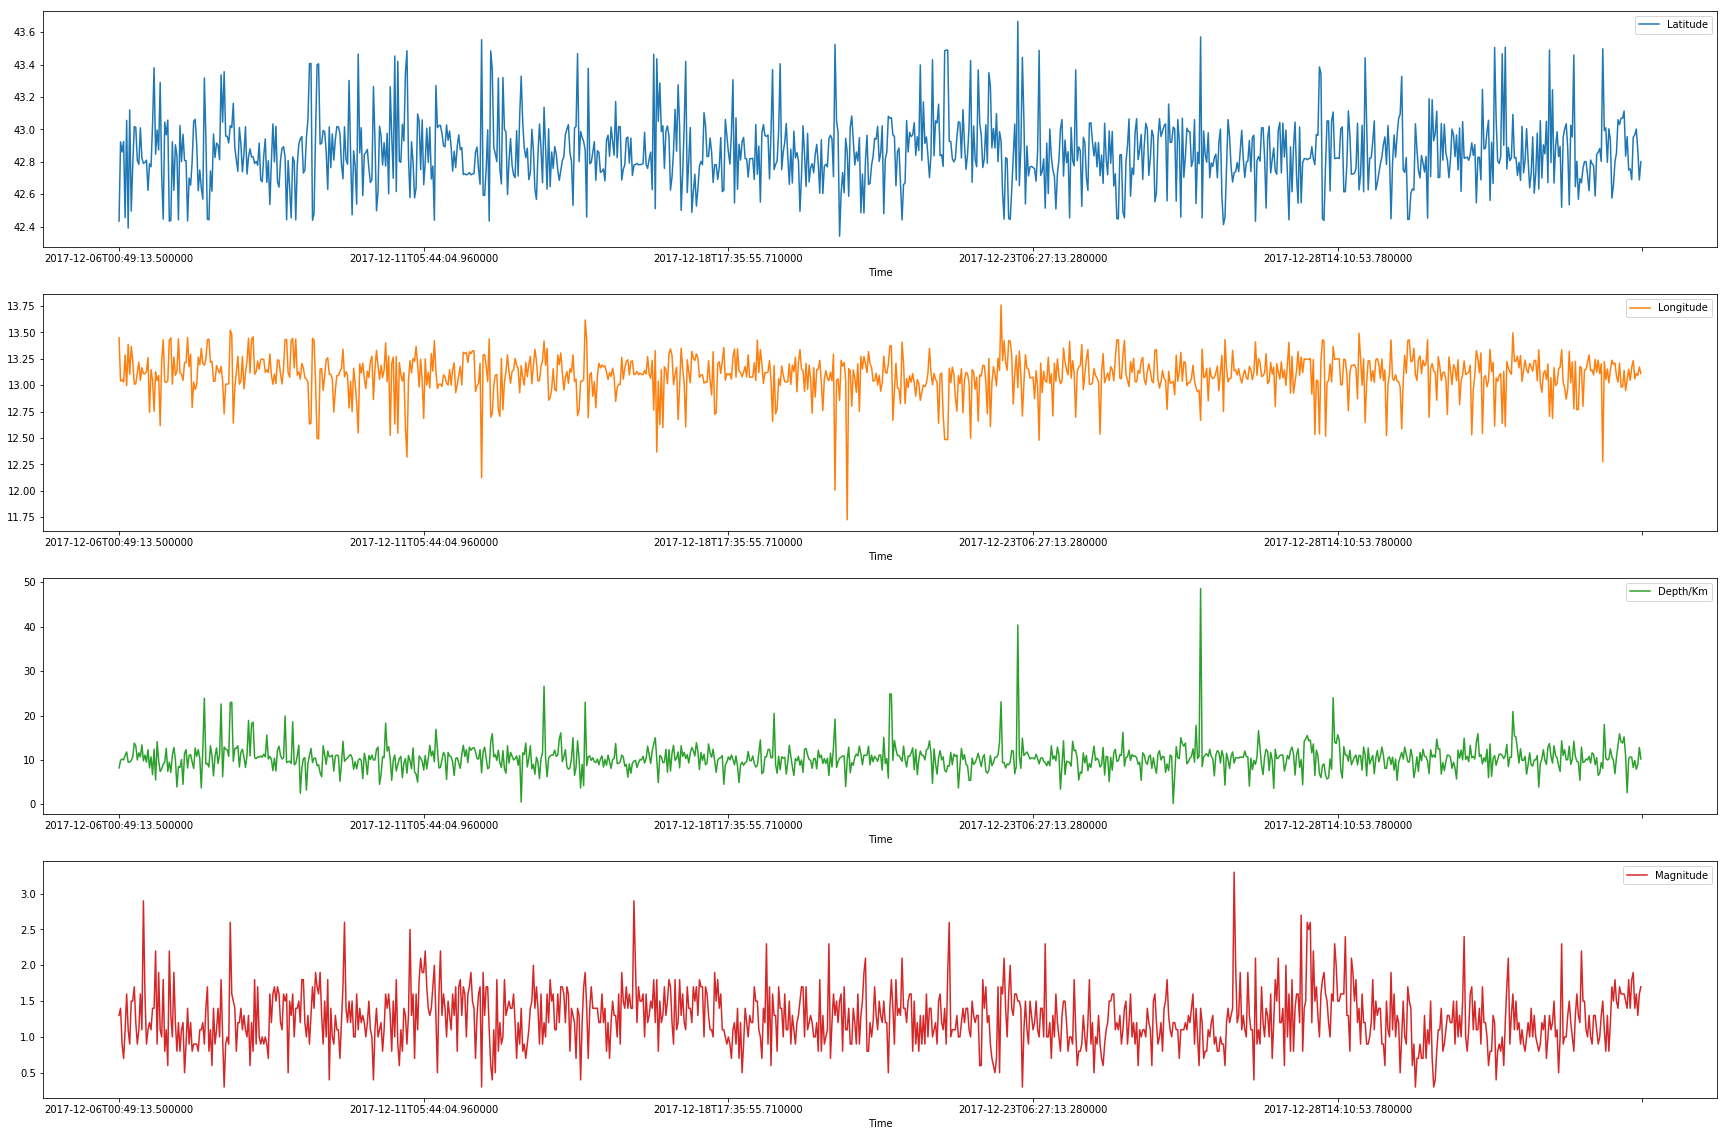

In [49]:
#plt.figure(figsize=(30, 2))
width = 30
height = 20
fig, ax = plt.subplots(figsize=(width, height))

data.tail(1000).plot('Time', numerical_features, ax=ax, subplots=True, style='-')
plt.xlabel('Time')
plt.show()

## Number of earthquake against magnitude

In [ ]:
mag = data.groupby('Magnitude').size()

plt.plot(mag)
plt.title('Number of earthquake against magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Earthquake frequency')
plot.show()